# ML_SP22_Project_2 (Classical Machine Learning Model Building)

### Due Date: 5/2 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
# include your Project 1 Decision Tree Model as well
from DT_michael_boodoosingh import DecisionTreeModel

### Original dataset was based on
https://archive.ics.uci.edu/ml/datasets/wine+quality

### However, we will be using a slightly modified version of the dataset as follow

In [4]:
df = pd.read_csv("wine-tasting.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal


In [5]:
df.shape

(6498, 13)

<AxesSubplot:xlabel='taste', ylabel='count'>

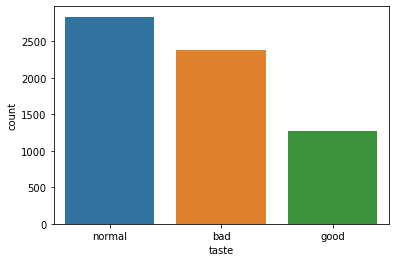

In [6]:
sns.countplot(x='taste',data=df)

<AxesSubplot:xlabel='taste', ylabel='count'>

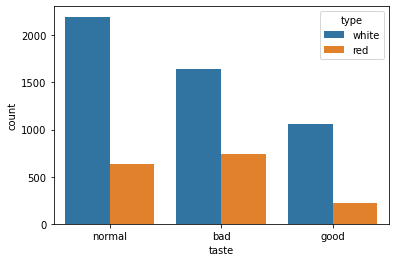

In [7]:
sns.countplot(x='taste', hue='type', data=df)

### Your task in this Project is to build the best predictive model to predict if a wine will be of good taste (ie we do not care if it is normal or bad taste, just good vs not good taste)

***You should follow the usual best practice in building models such as***

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations

***You should have also done the following***

* Try at least 3 models you have learned in class such as Logistic, Decision Tree, Random Forecast.
* Compare the sklearn Decision Tree with your own Decision Tree implementation results
* Include at least one ensemble models
* Identify out of all those you have tried, which one is the best model.

***And answer the following questions based on what you observe from your model building process***

* For the best fitted model, does it work better for the Red wine or White wine or similar
* Can ensemble methods improve your models?
* Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

### EDA

In [8]:
df.isnull().any()

fixed acidity            True
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
sulphates               False
alcohol                 False
type                    False
pHValue                 False
taste                   False
dtype: bool

In [9]:
var = "fixed acidity"

<AxesSubplot:ylabel='fixed acidity'>

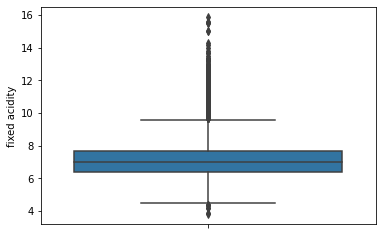

In [10]:
sns.boxplot(y=df[var])

#### Instead of removing the null values entirely, I decided to replace them with the median from the fixed acidity column 
#### I avoided replacement with the mean to consider the outlier present within the values.

In [11]:
nullToMedium = df[var].fillna(df[var].median())
df[var] = nullToMedium

df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
sulphates               False
alcohol                 False
type                    False
pHValue                 False
taste                   False
dtype: bool

In [12]:
df.shape

(6498, 13)

<AxesSubplot:ylabel='free sulfur dioxide'>

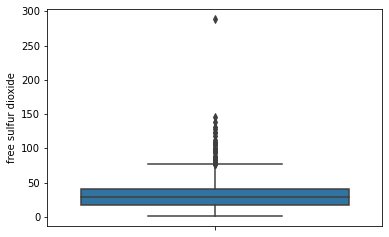

In [13]:
var = "free sulfur dioxide"
sns.boxplot(y=df[var])

#### Notable outlier above 250

<AxesSubplot:ylabel='free sulfur dioxide'>

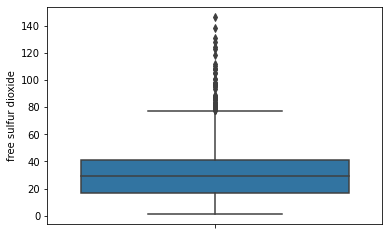

In [14]:
df = df[df[var] <= 250]
sns.boxplot(y=df[var])

<AxesSubplot:ylabel='density'>

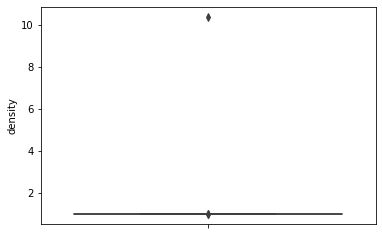

In [15]:
var = "density"
sns.boxplot(y=df[var])

#### Notable outlier past 10

<AxesSubplot:ylabel='density'>

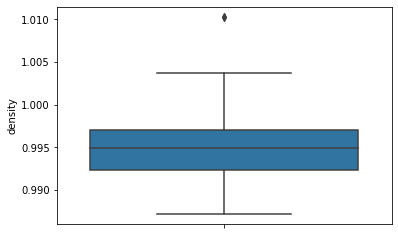

In [16]:
#Outlier has a noticably high density.
df = df[df[var] <= 10]
sns.boxplot(y=df[var])

In [17]:
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,0.45,8.8,white,very acidic,normal
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,0.49,9.5,white,quite acidic,normal
2,2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,white,quite acidic,normal
3,3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,white,very acidic,normal
4,4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,white,very acidic,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6493,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,red,midly acidic,bad
6492,6494,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,red,midly acidic,normal
6493,6495,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,red,midly acidic,normal
6494,6496,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,red,midly acidic,bad


### Relationships

In [18]:
df.corr()
#total sulfar dioxide and free sulfar dioxide has the second biggest but is the highest positive correlation
#density seems to have the second biggest correlation with alcohol and it is the biggest negative correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
fixed acidity,1.000000,0.218950,0.324327,-0.114343,0.298125,-0.285453,-0.329225,0.465708,0.299656,-0.095557
volatile acidity,0.218950,1.000000,-0.379715,-0.206219,0.377185,-0.357008,-0.416053,0.267487,0.225728,-0.038375
citric acid,0.324327,-0.379715,1.000000,0.140320,0.038917,0.136800,0.195998,0.093138,0.055864,-0.010567
residual sugar,-0.114343,-0.206219,0.140320,1.000000,-0.131683,0.418665,0.501932,0.539461,-0.190243,-0.366105
chlorides,0.298125,0.377185,0.038917,-0.131683,1.000000,-0.197695,-0.280172,0.367450,0.395489,-0.256735
free sulfur dioxide,-0.285453,-0.357008,0.136800,0.418665,-0.197695,1.000000,0.722007,0.030898,-0.193040,-0.182806
total sulfur dioxide,-0.329225,-0.416053,0.195998,0.501932,-0.280172,0.722007,1.000000,0.031655,-0.277256,-0.266462
density,0.465708,0.267487,0.093138,0.539461,0.367450,0.030898,0.031655,1.000000,0.261691,-0.701099
sulphates,0.299656,0.225728,0.055864,-0.190243,0.395489,-0.193040,-0.277256,0.261691,1.000000,-0.003419
alcohol,-0.095557,-0.038375,-0.010567,-0.366105,-0.256735,-0.182806,-0.266462,-0.701099,-0.003419,1.000000


<AxesSubplot:xlabel='taste', ylabel='count'>

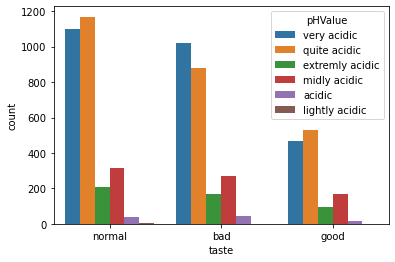

In [19]:
sns.countplot(x='taste', hue='pHValue', data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

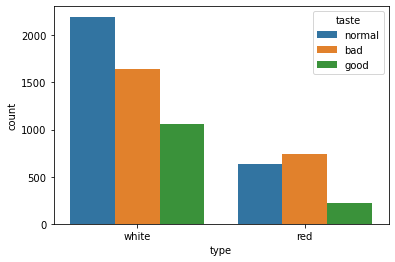

In [20]:
sns.countplot(x='type', hue='taste', data=df)

### Making the full dataframe by encoding categorical variables 

In [21]:
categorical_features = ['type', 'pHValue', 'taste']
numerical_features = ['fixed acidity', 'volatile acidity', 
                      'citric acid', 'residual sugar', 'chlorides', 
                      'free sulfur dioxide', 'total sulfur dioxide', 
                      'density', 'sulphates', 'alcohol']

numerical_df = df[numerical_features]
numerical_df.shape

(6496, 10)

#### I've decided to normalize the values. I though that some columns (free/total sulfar dioxide, for example) had noticeably large values compared to the other columns.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(numerical_df)
scaled = scaler.fit_transform(numerical_df)
scaled_df = pd.DataFrame(scaled, columns=numerical_df.columns)

scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
0,0.264463,0.126667,0.216867,0.648387,0.059801,0.302405,0.454924,0.598965,0.129213,0.115942
1,0.206612,0.146667,0.204819,0.032258,0.066445,0.089347,0.349515,0.297111,0.151685,0.217391
2,0.355372,0.133333,0.240964,0.203226,0.068106,0.199313,0.252427,0.344545,0.123596,0.304348
3,0.280992,0.100000,0.192771,0.254839,0.081395,0.316151,0.499307,0.366106,0.101124,0.275362
4,0.280992,0.100000,0.192771,0.254839,0.081395,0.316151,0.499307,0.366106,0.101124,0.275362
...,...,...,...,...,...,...,...,...,...,...
6491,0.198347,0.346667,0.048193,0.045161,0.134551,0.213058,0.105409,0.335921,0.202247,0.362319
6492,0.173554,0.313333,0.060241,0.051613,0.088040,0.261168,0.124827,0.345408,0.303371,0.463768
6493,0.206612,0.286667,0.078313,0.054839,0.111296,0.192440,0.094313,0.372143,0.297753,0.434783
6494,0.173554,0.376667,0.072289,0.045161,0.109635,0.213058,0.105409,0.360500,0.275281,0.318841


In [23]:
categorical_df = df[categorical_features]
categorical_df.head()

,type,pHValue,taste
0,white,very acidic,normal
1,white,quite acidic,normal
2,white,quite acidic,normal
3,white,very acidic,normal
4,white,very acidic,normal


In [24]:
white_dummy_df = pd.get_dummies(df[categorical_features],drop_first=False)
white_dummy_df = white_dummy_df.drop(['type_red','taste_bad','taste_normal'],axis=1)
white_dummy_df

,type_white,pHValue_acidic,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic,taste_good
0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0
2,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
6493,0,0,0,0,1,0,0,0
6494,0,0,0,0,1,0,0,0
6495,0,0,0,0,1,0,0,0
6496,0,0,0,0,1,0,0,0


In [25]:
# resetting the index of both the numerical and one hot dataframes seems to prevent an issue where
# the full dataframe unexpectedly adds an additional row.
scaled_df.reset_index(inplace=True, drop=True)
white_dummy_df.reset_index(inplace=True, drop=True)

In [26]:
white_full_df = pd.concat([scaled_df, white_dummy_df], axis=1)
pd.set_option("display.max_columns", 24)

In [27]:
white_full_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type_white,pHValue_acidic,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic,taste_good
0,0.264463,0.126667,0.216867,0.648387,0.059801,0.302405,0.454924,0.598965,0.129213,0.115942,1,0,0,0,0,0,1,0
1,0.206612,0.146667,0.204819,0.032258,0.066445,0.089347,0.349515,0.297111,0.151685,0.217391,1,0,0,0,0,1,0,0
2,0.355372,0.133333,0.240964,0.203226,0.068106,0.199313,0.252427,0.344545,0.123596,0.304348,1,0,0,0,0,1,0,0
3,0.280992,0.100000,0.192771,0.254839,0.081395,0.316151,0.499307,0.366106,0.101124,0.275362,1,0,0,0,0,0,1,0
4,0.280992,0.100000,0.192771,0.254839,0.081395,0.316151,0.499307,0.366106,0.101124,0.275362,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0.198347,0.346667,0.048193,0.045161,0.134551,0.213058,0.105409,0.335921,0.202247,0.362319,0,0,0,0,1,0,0,0
6492,0.173554,0.313333,0.060241,0.051613,0.088040,0.261168,0.124827,0.345408,0.303371,0.463768,0,0,0,0,1,0,0,0
6493,0.206612,0.286667,0.078313,0.054839,0.111296,0.192440,0.094313,0.372143,0.297753,0.434783,0,0,0,0,1,0,0,0
6494,0.173554,0.376667,0.072289,0.045161,0.109635,0.213058,0.105409,0.360500,0.275281,0.318841,0,0,0,0,1,0,0,0


We'll focus on the dataframe with white wine for now

In [28]:
X=white_full_df.drop('taste_good',axis=1)
y=white_full_df['taste_good']

### Logistic

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1578
           1       0.53      0.22      0.31       371

    accuracy                           0.81      1949
   macro avg       0.68      0.59      0.60      1949
weighted avg       0.78      0.81      0.78      1949

0.8137506413545408
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1569
           1       0.62      0.21      0.31       380

    accuracy                           0.82      1949
   macro avg       0.73      0.59      0.60      1949
weighted avg       0.79      0.82      0.78      1949

0.8209338122113905
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1564
           1       0.64      0.22      0.33       385

    accuracy                           0.82      1949
   macro avg       0.74      0.60      0.61      1949
weighted avg       0.80      0.82   

<AxesSubplot:xlabel='trial'>

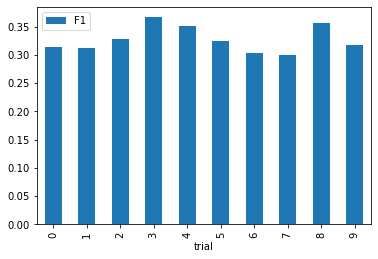

In [29]:
import random
from sklearn import metrics
from statistics import mean

f1_logistic = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=random.randint(1,1000))
    model = LogisticRegression()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    
    f1_logistic.append(metrics.f1_score(y_test, predictions))
    
    print(classification_report(y_test,predictions))
    print(accuracy_score(y_test, predictions))

rdf = pd.DataFrame( {'trial': range(10), 'F1': f1_logistic})
rdf.plot.bar(x='trial', y='F1')

In [30]:
mean(f1_logistic)

0.3273614088838593

### Decision Tree

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size=0.30, 
                                                        random_state=random.randint(1,1000))
    
model = DecisionTreeModel(max_depth=10)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

Done fitting
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1575
           1       0.58      0.50      0.54       374

    accuracy                           0.84      1949
   macro avg       0.73      0.71      0.72      1949
weighted avg       0.83      0.84      0.83      1949

0.8358132375577219


              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1559
           1       0.57      0.56      0.56       390

    accuracy                           0.83      1949
   macro avg       0.73      0.73      0.73      1949
weighted avg       0.83      0.83      0.83      1949

0.8281169830682401
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1551
           1       0.59      0.46      0.52       398

    accuracy                           0.82      1949
   macro avg       0.73      0.69      0.70      1949
weighted avg       0.81      0.82      0.82      1949

0.8240123140071832
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1565
           1       0.58      0.50      0.54       384

    accuracy                           0.83      1949
   macro avg       0.73      0.71      0.72      1949
weighted avg       0.82      0.83   

<AxesSubplot:xlabel='trial'>

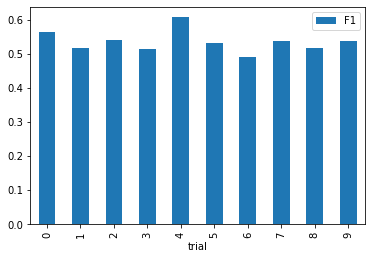

In [32]:
from sklearn.tree import DecisionTreeClassifier

f1_dt_sklearn = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size=0.30, 
                                                        random_state=random.randint(1,1000))
    
    model = DecisionTreeClassifier(max_depth=10)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    f1_dt_sklearn.append(metrics.f1_score(y_test, predictions))

    print(classification_report(y_test,predictions))
    print(accuracy_score(y_test, predictions))

rdf = pd.DataFrame( {'trial': range(10), 'F1': f1_dt_sklearn})
rdf.plot.bar(x='trial', y='F1')

In [33]:
mean(f1_dt_sklearn)

0.5350857561788557

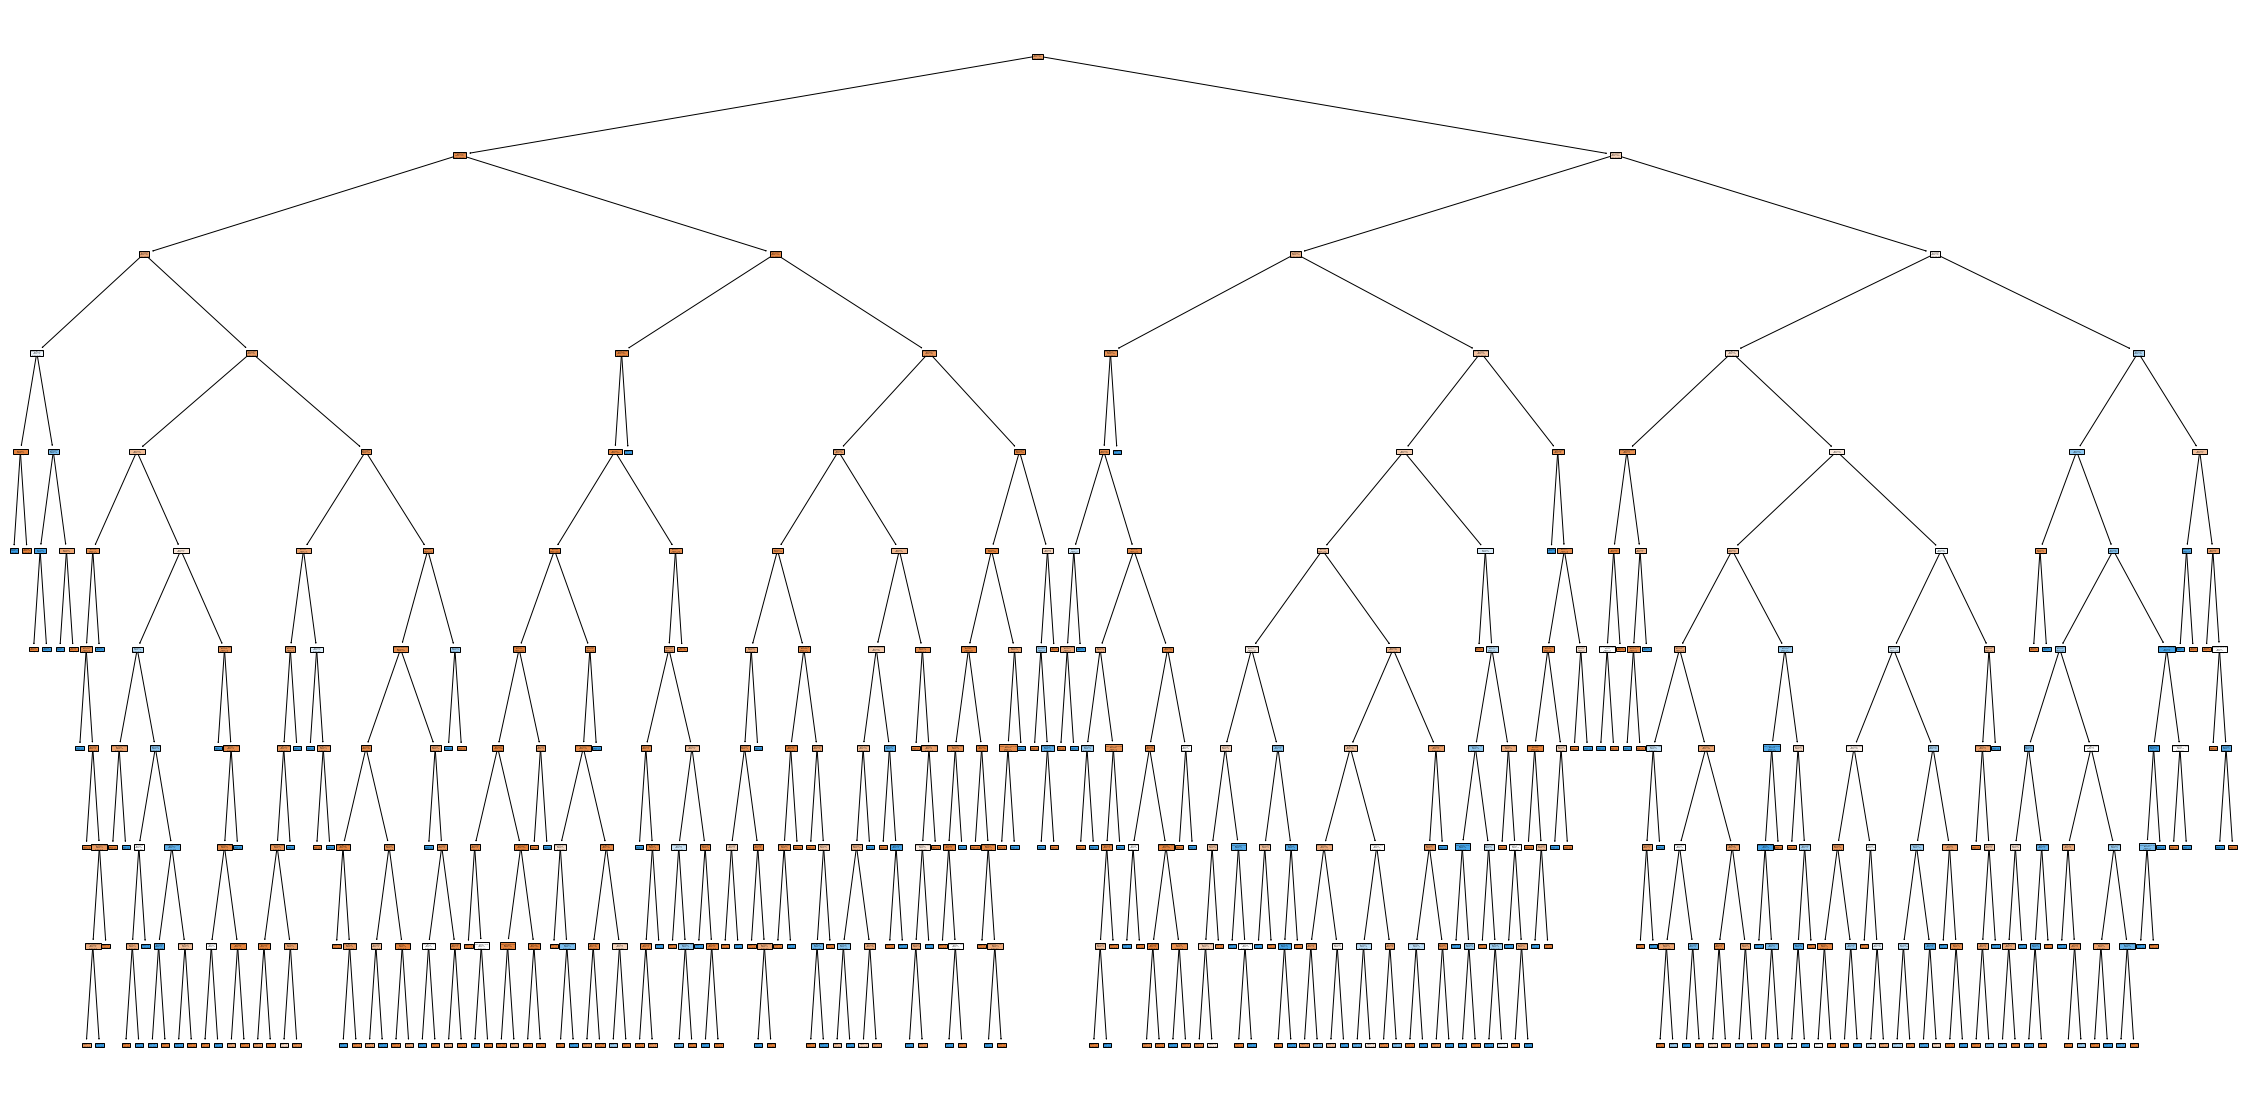

In [34]:
from sklearn import tree
fig=plt.figure(figsize=(40,20))
_=tree.plot_tree(model,feature_names=X.columns,filled=True)

### Random Forest

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1573
           1       0.80      0.56      0.66       376

    accuracy                           0.89      1949
   macro avg       0.85      0.76      0.79      1949
weighted avg       0.88      0.89      0.88      1949

0.8871216008209338
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1535
           1       0.77      0.55      0.64       414

    accuracy                           0.87      1949
   macro avg       0.83      0.75      0.78      1949
weighted avg       0.86      0.87      0.86      1949

0.8701898409440739
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1588
           1       0.78      0.56      0.65       361

    accuracy                           0.89      1949
   macro avg       0.84      0.76      0.79      1949
weighted avg       0.88      0.89   

<AxesSubplot:xlabel='trial'>

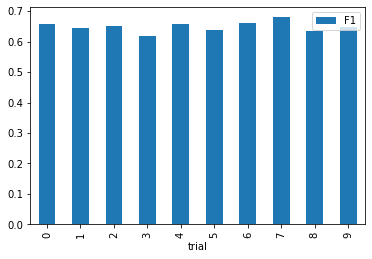

In [35]:
f1_rf = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size=0.30, 
                                                        random_state=random.randint(1,1000))
    
    rfModel = RandomForestClassifier(n_estimators=100)
    rfModel.fit(X_train, y_train)
    rf_predictions = rfModel.predict(X_test)
    
    f1_rf.append(metrics.f1_score(y_test, rf_predictions))

    print(classification_report(y_test,rf_predictions))
    print(accuracy_score(y_test, rf_predictions))

rdf = pd.DataFrame( {'trial': range(10), 'F1': f1_rf})
rdf.plot.bar(x='trial', y='F1')

In [36]:
mean(f1_rf)

0.648673094092968

### AdaBoost

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1560
           1       0.78      0.54      0.64       389

    accuracy                           0.88      1949
   macro avg       0.84      0.75      0.78      1949
weighted avg       0.87      0.88      0.87      1949

0.8783991790661878
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1551
           1       0.74      0.57      0.64       398

    accuracy                           0.87      1949
   macro avg       0.81      0.76      0.78      1949
weighted avg       0.86      0.87      0.86      1949

0.8696767573114418
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1562
           1       0.79      0.54      0.64       387

    accuracy                           0.88      1949
   macro avg       0.84      0.75      0.79      1949
weighted avg       0.87      0.88   

<AxesSubplot:xlabel='trial'>

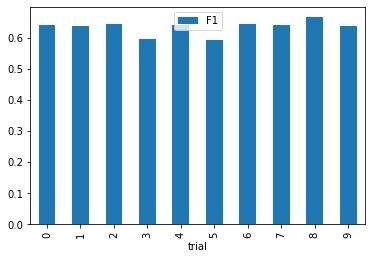

In [37]:
from sklearn.ensemble import AdaBoostClassifier
f1_ab = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size=0.30, 
                                                        random_state=random.randint(1,1000))
    
    adaModel = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=100,learning_rate=0.4)
    adaModel.fit(X_train, y_train)
    ab_predictions = adaModel.predict(X_test)
    
    f1_ab.append(metrics.f1_score(y_test, ab_predictions))

    print(classification_report(y_test,ab_predictions))
    print(accuracy_score(y_test, ab_predictions))

rdf = pd.DataFrame( {'trial': range(10), 'F1': f1_ab})
rdf.plot.bar(x='trial', y='F1')

In [38]:
mean(f1_ab)

0.6338825008056388

### Gradient Boosting

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1555
           1       0.69      0.49      0.57       394

    accuracy                           0.85      1949
   macro avg       0.79      0.72      0.74      1949
weighted avg       0.84      0.85      0.84      1949

0.8527449974345819
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1565
           1       0.66      0.53      0.59       384

    accuracy                           0.85      1949
   macro avg       0.77      0.73      0.75      1949
weighted avg       0.84      0.85      0.85      1949

0.8532580810672139
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1535
           1       0.63      0.43      0.51       414

    accuracy                           0.83      1949
   macro avg       0.74      0.68      0.70      1949
weighted avg       0.81      0.83   

<AxesSubplot:xlabel='trial'>

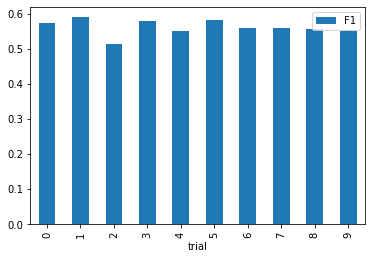

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
f1_gb = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size=0.30, 
                                                        random_state=random.randint(1,1000))
    
    gradientModel = GradientBoostingClassifier(n_estimators=100,learning_rate=0.4)
    gradientModel.fit(X_train, y_train)
    gb_predictions = gradientModel.predict(X_test)
    
    f1_gb.append(metrics.f1_score(y_test, gb_predictions))

    print(classification_report(y_test,gb_predictions))
    print(accuracy_score(y_test, gb_predictions))

rdf = pd.DataFrame( {'trial': range(10), 'F1': f1_gb})
rdf.plot.bar(x='trial', y='F1')

In [40]:
mean(f1_gb)

0.561021130934144

### XGBoost

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1572
           1       0.74      0.59      0.65       377

    accuracy                           0.88      1949
   macro avg       0.82      0.77      0.79      1949
weighted avg       0.87      0.88      0.87      1949

0.8799384299640841
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1569
           1       0.74      0.61      0.67       380

    accuracy                           0.88      1949
   macro avg       0.82      0.78      0.80      1949
weighted avg       0.88      0.88      0.88      1949

0.8814776808619805
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1578
           1       0.68      0.57      0.62       371

    accuracy                           0.87      1949
   macro avg       0.79      0.75      0.77      1949
weighted avg       0.86      0.87   

<AxesSubplot:xlabel='trial'>

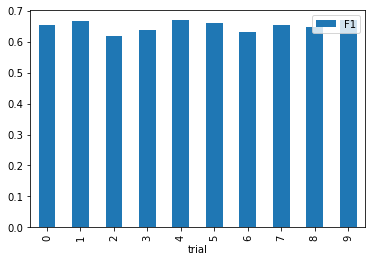

In [41]:
import xgboost as xgb
f1_xgb = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size=0.30, 
                                                        random_state=random.randint(1,1000))
    
    xgbModel = xgb.XGBClassifier(learning_rate=0.4)
    xgbModel.fit(X_train, y_train)
    xgb_predictions = xgbModel.predict(X_test)
    
    f1_xgb.append(metrics.f1_score(y_test, xgb_predictions))

    print(classification_report(y_test,xgb_predictions))
    print(accuracy_score(y_test, xgb_predictions))

rdf = pd.DataFrame( {'trial': range(10), 'F1': f1_xgb})
rdf.plot.bar(x='trial', y='F1')

In [42]:
mean(f1_xgb)

0.651225437696672

#### The XGBoost classifier has the best performance out of any of the models used. Moving on, we'll be using the XGBoost ensemble instead of the simple Random Forest classifier

# Is the best model better with red wine or white wine?

The above model already excludes red wine

In [43]:
red_dummy_df = pd.get_dummies(df[categorical_features])
red_dummy_df = red_dummy_df.drop(['type_white','taste_bad','taste_normal'],axis=1)

red_dummy_df.reset_index(inplace=True, drop=True)

red_full_df = pd.concat([scaled_df, red_dummy_df], axis=1)
red_full_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type_red,pHValue_acidic,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic,taste_good
0,0.264463,0.126667,0.216867,0.648387,0.059801,0.302405,0.454924,0.598965,0.129213,0.115942,0,0,0,0,0,0,1,0
1,0.206612,0.146667,0.204819,0.032258,0.066445,0.089347,0.349515,0.297111,0.151685,0.217391,0,0,0,0,0,1,0,0
2,0.355372,0.133333,0.240964,0.203226,0.068106,0.199313,0.252427,0.344545,0.123596,0.304348,0,0,0,0,0,1,0,0
3,0.280992,0.100000,0.192771,0.254839,0.081395,0.316151,0.499307,0.366106,0.101124,0.275362,0,0,0,0,0,0,1,0
4,0.280992,0.100000,0.192771,0.254839,0.081395,0.316151,0.499307,0.366106,0.101124,0.275362,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0.198347,0.346667,0.048193,0.045161,0.134551,0.213058,0.105409,0.335921,0.202247,0.362319,1,0,0,0,1,0,0,0
6492,0.173554,0.313333,0.060241,0.051613,0.088040,0.261168,0.124827,0.345408,0.303371,0.463768,1,0,0,0,1,0,0,0
6493,0.206612,0.286667,0.078313,0.054839,0.111296,0.192440,0.094313,0.372143,0.297753,0.434783,1,0,0,0,1,0,0,0
6494,0.173554,0.376667,0.072289,0.045161,0.109635,0.213058,0.105409,0.360500,0.275281,0.318841,1,0,0,0,1,0,0,0


In [44]:
X=red_full_df.drop('taste_good',axis=1)
y=red_full_df['taste_good']

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1558
           1       0.72      0.60      0.65       391

    accuracy                           0.87      1949
   macro avg       0.81      0.77      0.79      1949
weighted avg       0.87      0.87      0.87      1949

0.8722421754746024
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1580
           1       0.71      0.56      0.63       369

    accuracy                           0.87      1949
   macro avg       0.80      0.75      0.77      1949
weighted avg       0.87      0.87      0.87      1949

0.8727552591072345
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1571
           1       0.71      0.59      0.65       378

    accuracy                           0.87      1949
   macro avg       0.81      0.77      0.79      1949
weighted avg       0.87      0.87   

<AxesSubplot:xlabel='trial'>

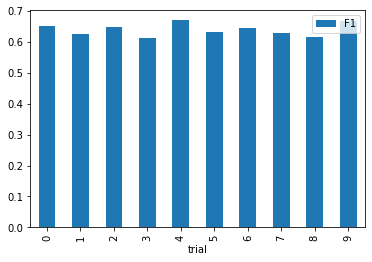

In [45]:
f1_xgb = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size=0.30, 
                                                        random_state=random.randint(1,1000))
    
    xgbModel = xgb.XGBClassifier(learning_rate=0.4)
    xgbModel.fit(X_train, y_train)
    xgb_predictions = xgbModel.predict(X_test)
    
    f1_xgb.append(metrics.f1_score(y_test, xgb_predictions))

    print(classification_report(y_test,xgb_predictions))
    print(accuracy_score(y_test, xgb_predictions))

rdf = pd.DataFrame( {'trial': range(10), 'F1': f1_xgb})
rdf.plot.bar(x='trial', y='F1')

In [46]:
mean(f1_xgb)

0.6399071414829585

#### Using red wine or white wine for the model doesn't make much of a difference. They're similar in performances.

### Importance of pHValue

In [50]:
noPH_df = pd.get_dummies(df[['type','taste']],drop_first=True)
noPH_df = noPH_df.drop(['taste_normal'],axis=1)

noPH_df.reset_index(inplace=True, drop=True)
noPH_full_df = pd.concat([scaled_df, noPH_df], axis=1)

noPH_full_df

X=noPH_full_df.drop('taste_good',axis=1)
y=noPH_full_df['taste_good']

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1548
           1       0.77      0.56      0.65       401

    accuracy                           0.88      1949
   macro avg       0.83      0.76      0.79      1949
weighted avg       0.87      0.88      0.87      1949

0.8753206772703951
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1571
           1       0.66      0.58      0.62       378

    accuracy                           0.86      1949
   macro avg       0.78      0.75      0.77      1949
weighted avg       0.86      0.86      0.86      1949

0.8614674191893279
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1530
           1       0.72      0.58      0.65       419

    accuracy                           0.86      1949
   macro avg       0.81      0.76      0.78      1949
weighted avg       0.86      0.86   

<AxesSubplot:xlabel='trial'>

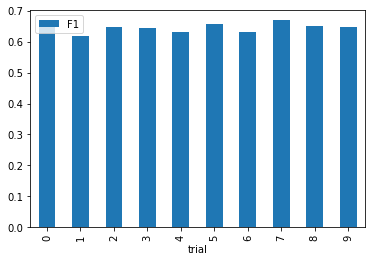

In [51]:
f1_xgb = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, test_size=0.30, 
                                                        random_state=random.randint(1,1000))
    
    xgbModel = xgb.XGBClassifier(learning_rate=0.4)
    xgbModel.fit(X_train, y_train)
    xgb_predictions = xgbModel.predict(X_test)
    
    f1_xgb.append(metrics.f1_score(y_test, xgb_predictions))

    print(classification_report(y_test,xgb_predictions))
    print(accuracy_score(y_test, xgb_predictions))

rdf = pd.DataFrame( {'trial': range(10), 'F1': f1_xgb})
rdf.plot.bar(x='trial', y='F1')

In [52]:
mean(f1_xgb)

0.6436849827884807

#### There doesn't seem to be a significant impact by excluding the pH columns from the data frame. The average f1-score isn't far off from the averages of sklearn RandomForest, XGBoost, and AdaBoost.

In conclusion, ensemble methods can indeed improve your models even if it's by a small amount. 
Logistic and Decision Trees typically earned an f1-score averaging above .3 for the former and .5 for the latter 

In comparison, the ensemble methods did noticeably better (in both the red wine and white wine models) with f1-scores averaging above .60 (AdaBoost is the exception with a mean barely above .55 but is still noticeably better than the non-ensemble models)

In terms of f1-score averages: 
#### XGBoost > RandomForest (sklearn) > AdaBoost > GradientBoosting > DecisionTree > Logistic   